# Violin plot

Used for qualitative vs quantitative variables. Instead of plotting data points individually, we have a curve for each level of the categorical variable whose area depicts the distribution of the points. Where the curve is wider, there are more data points. It is basically a smooth histogram or density curve turned on its side. 

Seaborn's violinplot() function can be used to create violin plots.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# import data
fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')

In [3]:
# view data info
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [4]:
# view the head
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Violin plot for plotting a Quantitative variable (fuel efficiency) versus Qualitative variable (vehicle class)

In [5]:
# check unique vehicle classes
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

<bound method ExtensionDtype.is_dtype of <class 'pandas.core.dtypes.dtypes.CategoricalDtype'>>


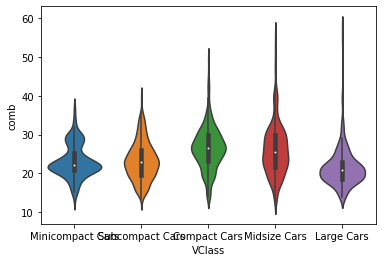

In [6]:
sedan_classes = ['Minicompact Cars','Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

print(vclasses.is_dtype)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

sb.violinplot(data=fuel_econ, x='VClass', y='comb');

Inside each curve, there is a black shape with a white dot inside, a miniature box plot. If you'd like to remove the box plot, you can set the inner = None parameter in the violinplot call to simplify the look of the final visualization.

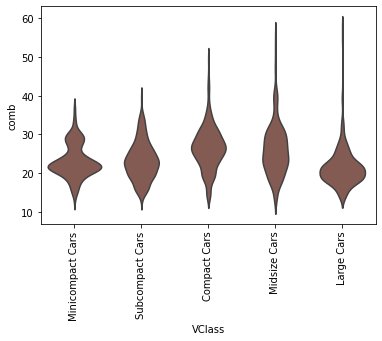

In [7]:
# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 

base_color = sb.color_palette()[5]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None);
plt.xticks(rotation=90);

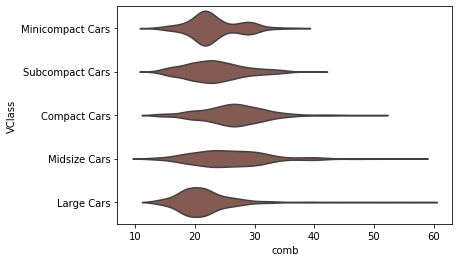

In [8]:
sb.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, inner=None);

### Violin plot with quartile information in the middle
In violinplot, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

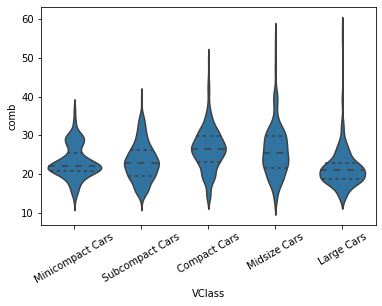

In [9]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

What is the relationship between the size of a car and the size of its engine? The vehicle classes can be found in the VClass column, while the engine sizes are in the displ column (in liters).

Hint: Make sure that the order of vehicle classes makes sense in your plot!

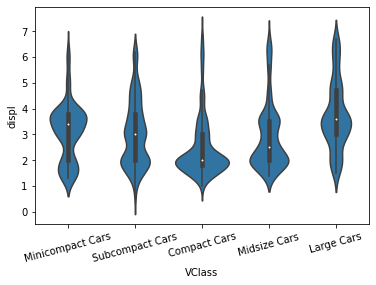

In [10]:
def violinbox_solution_1():
    # data setup
    fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
    # Note: based on the pandas version, you need to code differently
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else: # pre-v0.21
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,categories = sedan_classes)
    # plotting
    base_color = sb.color_palette()[0]
    sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ',
                  color = base_color)
    plt.xticks(rotation = 15)

violinbox_solution_1()